In [1]:
import numpy as np

a = [2,4]
b = [3,6]

a+b

[2, 4, 3, 6]

In [3]:
import numpy as np

a = np.array([2,4])
b = np.array([3,6])

a*b

array([ 6, 24])

In [5]:
import numpy as np

a = np.array([2,4])
rot = np.array([[0,-1],[1,0]])

rot.dot(a)

array([-4,  2])

In [11]:
import pandas as pd

# df = pd.DataFrame([[1,2],[4,5]])
# df
df = pd.DataFrame({
    "age": [42,45,32,28],
    "nom": ["Emile", "Jacques", "Elise", "Aurélie"]
})
df

,age,nom
0,42,Emile
1,45,Jacques
2,32,Elise
3,28,Aurélie


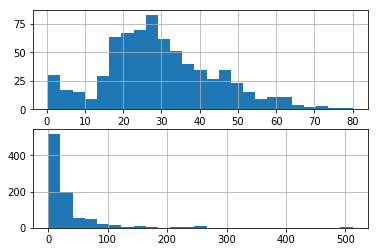

In [35]:
%matplotlib inline

df = pd.read_csv("train.csv")
df.describe()
df.columns
df.dtypes
df["Age"]

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1)
df["Age"].hist(bins=25, ax=axes[0])
df["Fare"].hist(bins=25, ax=axes[1])


In [28]:
# Filtrer les colonnes
df[["Survived", "Age"]]
# Opérations
df["Age"] + 40
# Comparaisons
df["Age"] > 18
# Filtrer
df[(df["Age"] > 18) & (df["Survived"] == 1)]
df[df["Age"] > 18].count()
len(df[df["Age"] > 18])


575

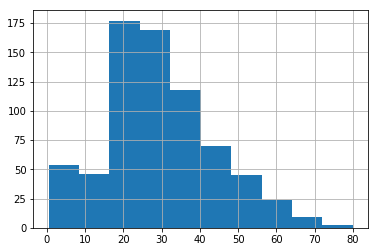

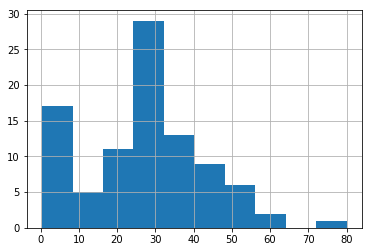

In [39]:
# Proportion de femmes
# Proportion d'hommes
# Proportion de femmes qui ont survécu
# Proportion d'hommes qui ont survécu

# Histogramme des ages
df.Age.hist()
plt.show()
# Histogramme des ages parmi les hommes qui ont survécu
df[(df["Sex"] == "male") & (df["Survived"] == 1)].Age.hist()
plt.show()




In [40]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [83]:
df = pd.read_csv("train.csv")
df["Sex"] = df["Sex"].map({"female": 1, "male": 0})
df["Sex"].head()
df["Embarked"].unique()
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df[["Sex","Embarked"]].head()
df.Name.head()

import re

def extract_title(name):
    title = re.findall(", ([^.]+)\.", name)
    return title[0]

df["Title"] = df["Name"].map(extract_title)
# extract_title("Cumings, Mrs. John Bradley (Florence Briggs Th")
titles = list(df.Title.unique())

def map_title(title):
    return titles.index(title)

df["Title"] = df["Title"].map(map_title)
# df["Title"] = df["Title"].map(lambda t: titles.index(t))
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
Title            int64
dtype: object

In [82]:
# Est-ce que le capitaine est mort
df[df["Title"] == "Capt"]
# Le lieu de embarquement où on a la plus grande mortalité
print(len(df[(df["Embarked"] == 0) & (df["Survived"] == 0)]) / len(df[(df["Embarked"] == 0)]))

print(len(df[(df["Embarked"] == 1) & (df["Survived"] == 0)]) / len(df[(df["Embarked"] == 1)]))

print(len(df[(df["Embarked"] == 2) & (df["Survived"] == 0)]) / len(df[(df["Embarked"] == 2)]))


0.6630434782608695
0.44642857142857145
0.6103896103896104


In [123]:
data_set = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
data_set.Age = data_set.Age / data_set.Age.max()
# data_set.Pclass = data_set.Pclass / data_set.Pclass.max()
# data_set.Parch = data_set.Parch + data_set.SibSp
# data_set.Parch = data_set.Parch / data_set.Parch.max()
# data_set.drop(columns=["SibSp"], inplace=True)
# data_set.Fare = data_set.Fare / (1 + data_set.Parch)
# data_set.Fare = data_set.Fare / data_set.Fare.max()

data_set.count()
data_set.dropna(inplace=True)
data_set.count()


Survived    712
Pclass      712
Sex         712
Age         712
SibSp       712
Parch       712
Fare        712
Embarked    712
Title       712
dtype: int64

In [124]:
from sklearn.neighbors import KNeighborsClassifier as KNN

training_set = data_set[:600]
testing_set = data_set[600:]


for n in range(1,40):
    knn = KNN(n_neighbors=n)

    knn.fit(training_set.drop(columns=["Survived"]), training_set["Survived"])

    s = knn.score(testing_set.drop(columns=["Survived"]), testing_set["Survived"])
    print(f"n={n} score = {s}")


n=1 score = 0.7767857142857143
n=2 score = 0.7946428571428571
n=3 score = 0.8214285714285714
n=4 score = 0.8392857142857143
n=5 score = 0.8125
n=6 score = 0.8125
n=7 score = 0.8392857142857143
n=8 score = 0.8125
n=9 score = 0.8392857142857143
n=10 score = 0.8482142857142857
n=11 score = 0.8214285714285714
n=12 score = 0.8303571428571429
n=13 score = 0.8214285714285714
n=14 score = 0.7767857142857143
n=15 score = 0.7946428571428571
n=16 score = 0.8035714285714286
n=17 score = 0.7946428571428571
n=18 score = 0.8035714285714286
n=19 score = 0.8035714285714286
n=20 score = 0.8125
n=21 score = 0.8035714285714286
n=22 score = 0.8125
n=23 score = 0.7946428571428571
n=24 score = 0.7946428571428571
n=25 score = 0.7946428571428571
n=26 score = 0.8125
n=27 score = 0.7857142857142857
n=28 score = 0.7946428571428571
n=29 score = 0.7857142857142857
n=30 score = 0.7678571428571429
n=31 score = 0.7589285714285714
n=32 score = 0.7767857142857143
n=33 score = 0.7767857142857143
n=34 score = 0.7946428571

In [169]:
knn = KNN(n_neighbors=10)

knn.fit(training_set.drop(columns=["Survived"]), training_set["Survived"])

moi = pd.DataFrame([{
    "Pclass": 3.0,
    "Sex": 0.0,
    "Age": 28 / df.Age.max(),
    "SibSp": 1.0,
    "Parch": 2.0,
    "Fare": 8.0,
    "Embarked": 1.0,
    "Title": 1.0
}])

print(knn.predict(moi[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title"]]))
training_set.head()
# knn.predict(moi)
# res = knn.predict(training_set.drop(columns=["Survived"]))
# training_set.iloc[3].drop(columns=["Survived"])

[0]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0.2750,1,0,7.2500,0.0,0
1,1,1,1,0.4750,1,0,71.2833,1.0,1
2,1,3,1,0.3250,0,0,7.9250,0.0,2
3,1,1,1,0.4375,1,0,53.1000,0.0,1
4,0,3,0,0.4375,0,0,8.0500,0.0,0


['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

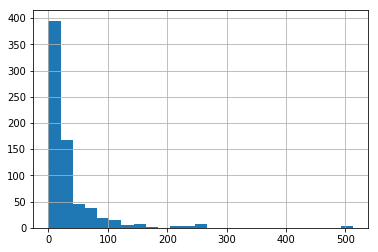

In [132]:
data_set.Fare.hist(bins=25)
data_set.Fare.describe()
